In [1]:
import numpy as np
import pandas as pd

In [2]:
!gdown  1l53Fgkg1G1ekCxxgaDQ00EXrnSMTeJj-

Downloading...
From: https://drive.google.com/uc?id=1l53Fgkg1G1ekCxxgaDQ00EXrnSMTeJj-
To: /content/sample_data.csv
100% 32.5k/32.5k [00:00<00:00, 39.8MB/s]


In [3]:
sample_data = pd.read_csv('sample_data.csv')

In [4]:
sample_data.head()

,Gender,Age_less_35,JobRole,Attrition
0,Male,True,Laboratory Technician,0
1,Male,False,Sales Executive,1
2,Male,True,Sales Representative,1
3,Female,False,Healthcare Representative,0
4,Male,True,Sales Executive,0


In [5]:
def entropy(Y):
  p = Y.value_counts()/len(Y)

  en= np.sum(-p*np.log2(p + 1e-9))

  return en

In [6]:
entropy(sample_data['Attrition'])

0.6554120789588516

In [7]:
sample_data['Attrition'].value_counts()

0    831
1    169
Name: Attrition, dtype: int64

In [8]:
def calculate_weighted_entropy(feature, Y):
  categories = feature.unique()

  weighted_en = 0.0

  for category in categories:
    
    Y_category = Y[feature == category]
    
    weight  = len(Y_category)/ len(Y)

    en_category = entropy(Y_category)

    weighted_en += (weight*en_category)

  return weighted_en

In [9]:
def information_gain(feature, Y):
  parent_ent = entropy(Y)
  child_ent = calculate_weighted_entropy(feature, Y)

  return (parent_ent - child_ent)

In [10]:
calculate_weighted_entropy(sample_data['Age_less_35'], sample_data['Attrition'])

0.6339490140391142

In [11]:
information_gain(sample_data['Age_less_35'], sample_data['Attrition'])

0.021463064919737374

In [12]:
information_gain(sample_data['Gender'], sample_data['Attrition'])

3.2976904443815513e-06

In [13]:
information_gain(sample_data['JobRole'], sample_data['Attrition'])

0.05429906805101914

In [14]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 83.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 55.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 18.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 12.9MB/s]


In [15]:
import pickle

# Load data 
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_sm = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_sm = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [16]:
y_sm.value_counts()

0    924
1    924
Name: Attrition, dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree_clf = DecisionTreeClassifier()

In [19]:
tree_clf.fit(X_sm, y_sm)

DecisionTreeClassifier()

In [20]:
y_pred = tree_clf.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 1])

In [21]:
print("Training acc:", tree_clf.score(X_sm, y_sm) )
print("Testing acc:", tree_clf.score(X_test, y_test) )

Training acc: 1.0
Testing acc: 0.7527173913043478


In [22]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(tree_clf, X_sm, y_sm, scoring = 'accuracy', cv=10)

In [23]:
# validation accuracy
accuracies.mean()

0.8214747356051705

In [24]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_sm.columns)

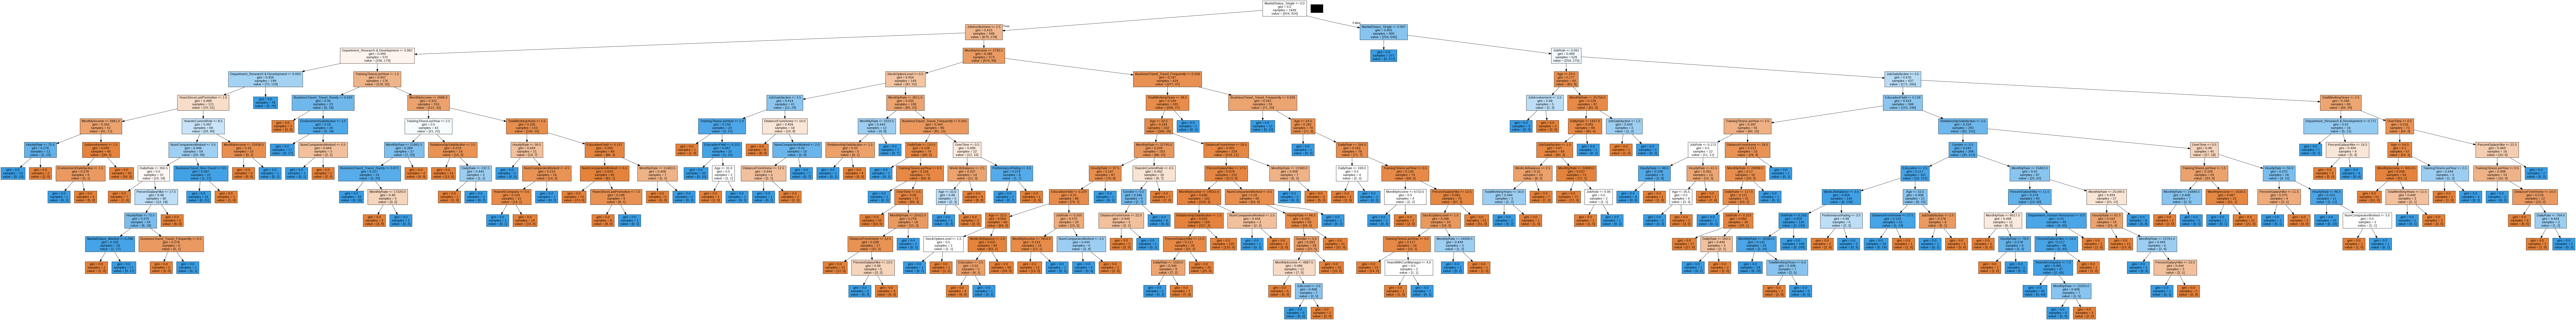

In [25]:
tree_clf = tree_clf.fit(X_sm, y_sm)

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [29]:
import matplotlib.pyplot as plt

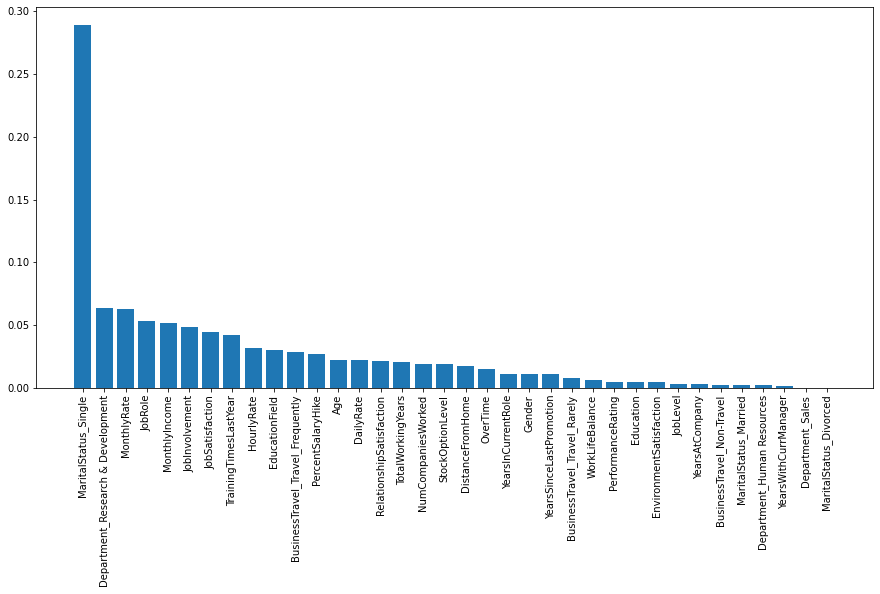

In [33]:
plt.figure(figsize=(15, 7))

importances = tree_clf.feature_importances_
indicies = np.argsort(importances)[::-1]
names = [X_sm.columns[i] for i in indicies]

plt.bar(range(X_sm.shape[1]), importances[indicies])
plt.xticks(range(X_sm.shape[1]), names, rotation=90)
plt.show()

In [27]:
features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [34]:
(1+2+3+4+5+6)/6

3.5

# Decision Trees for Regression

In [35]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 14.1MB/s]


In [36]:
regression_data = pd.read_csv('regData.csv')

In [37]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [38]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


In [39]:
X = regression_data['X']
Y = regression_data['Y']

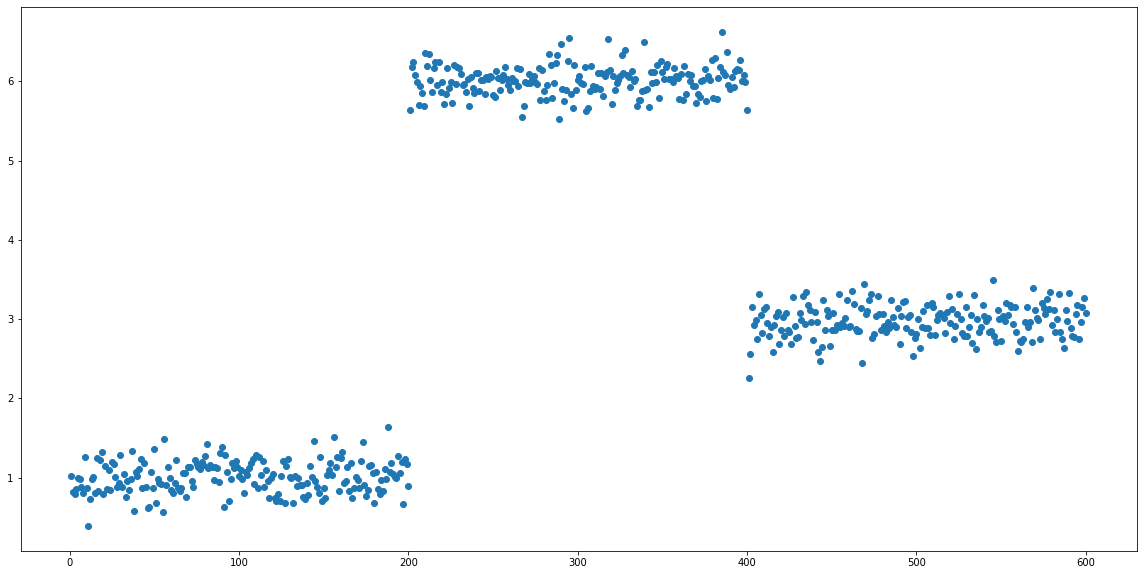

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(X, Y)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,Y.values,test_size=0.25,random_state=43,shuffle = True)  

In [54]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
model = DecisionTreeRegressor(max_depth = 2)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [63]:
model.score(X_train, y_train)

0.9901377889632021

In [64]:
model.score(X_test, y_test)

0.9920684910891107

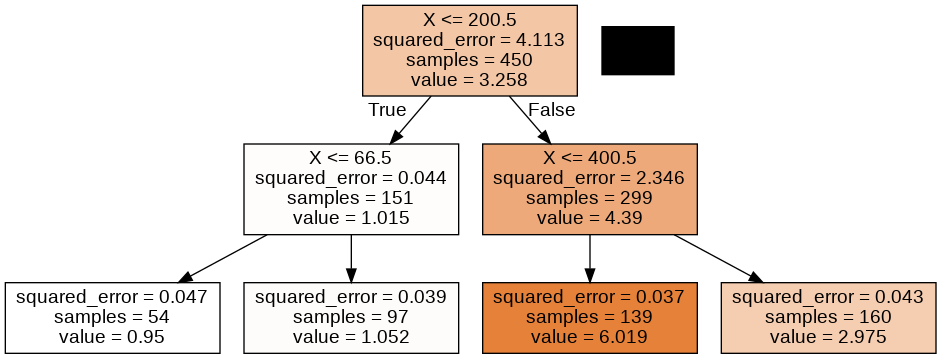

In [65]:
features = list(regression_data.columns[0])

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

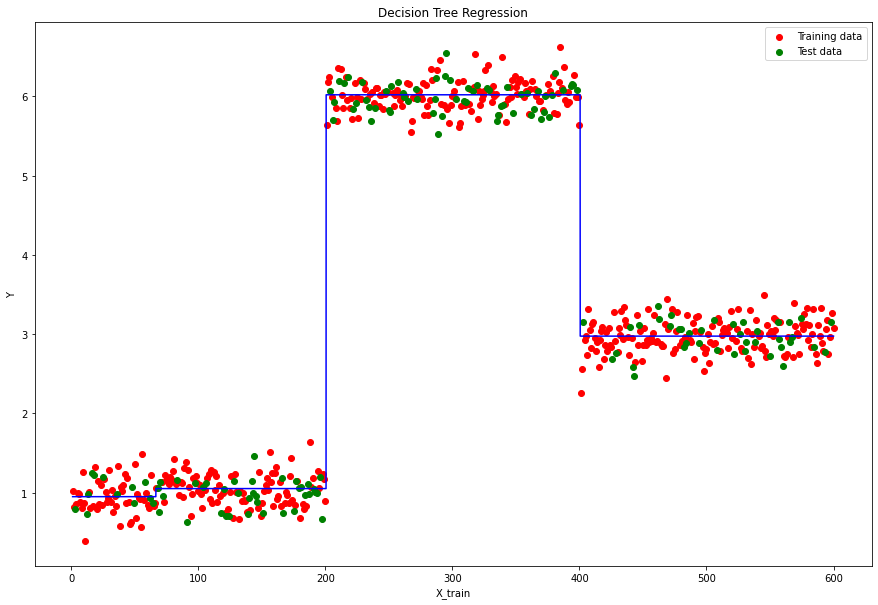

In [67]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train') 
plt.ylabel('Y')
plt.legend()
plt.show()